# <font color='GREEN'>  **CNN to detect house numbers using the standard SVHN dataset**</font>


The data of the Street View House Numbers dataset in .mat

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# <font color='RED'>  **1. Import Required Libraries**</font>

In [2]:

import keras
import tensorflow 
import seaborn                as sns
import numpy                  as np
from scipy.io                    import loadmat
from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import LabelBinarizer
from sklearn.metrics             import confusion_matrix
from keras.preprocessing.image   import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from matplotlib                  import pyplot as plt
%matplotlib inline

In [3]:
# Set random state

np.random.seed(20)


#<font color='RED'>  **2. Dataload and Preprocessing**</font>

In [4]:
# Load the data

train_raw = loadmat('/content/drive/MyDrive/SVHN/train_mat/train.mat')
test_raw = loadmat('/content/drive/MyDrive/SVHN/test_mat/test.mat')

In [5]:
# Load images and labels

train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
test_labels = test_raw['y']

In [6]:
# Check the shape of the data

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [7]:
# Fix the axes of the images

train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


In [8]:
# transfer train images into float type

train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

In [9]:
# transfer class images into integer type

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

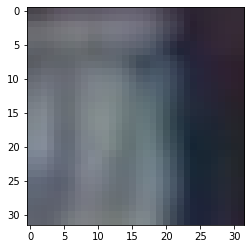

Label:  [0 0 0 0 1 0 0 0 0 0]


In [26]:
# Plot a random image and its label

plt.imshow(train_images[455])
plt.show()

print('Label: ', train_labels[4550])

In [11]:
# Normalizing  images 

print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= 255.0
test_images /= 255.0

Min: 0.0, Max: 255.0


In [12]:
# Label Binarisation

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

#<font color='RED'>  **3. Train Test Split**</font>

In [13]:
# Split train data into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.15, random_state=22)

In [14]:
y_val.shape

(10989, 10)


#<font color='RED'>  **4. Build CNN Architecture**</font>

In [15]:
# Data augmentation
# Image data augmentation is  technique that can be used to  
# expand the size of a training dataset by creating modified versions of images in the dataset.

datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [16]:
# Define actual model

#keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer =tensorflow.keras.optimizers.Adam(learning_rate=1e-3, amsgrad=True)
# model_checkpoint = keras.callbacks.ModelCheckpoint(
#                    '/kaggle/working/best_cnn.h5', 
#                    save_best_only=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [18]:
# Fit model in order to make predictions

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=512),
                              epochs=70, validation_data=(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
122/122 [==============================] - 74s 358ms/step - loss: 2.3191 - accuracy: 0.1499 - val_loss: 2.2658 - val_accuracy: 0.1948
Epoch 2/70
122/122 [==============================] - 42s 346ms/step - loss: 2.1501 - accuracy: 0.2029 - val_loss: 2.2570 - val_accuracy: 0.1961
Epoch 3/70
122/122 [==============================] - 43s 353ms/step - loss: 2.0265 - accuracy: 0.2455 - val_loss: 1.8975 - val_accuracy: 0.3861
Epoch 4/70
122/122 [==============================] - 43s 351ms/step - loss: 1.8251 - accuracy: 0.3177 - val_loss: 1.3701 - val_accuracy: 0.5172
Epoch 5/70
122/122 [==============================] - 43s 350ms/step - loss: 1.4746 - accuracy: 0.4456 - val_loss: 1.1117 - val_accuracy: 0.6775
Epoch 6/70
122/122 [==============================] - 43s 353ms/step - loss: 1.1232 - accuracy: 0.5988 - val_loss: 0.5036 - val_accuracy: 0.8631
Epoch 7/70
122/122 [==============================] - 44s 360ms/step - loss: 0.8180 - accuracy: 0.7249 - val_loss: 0.3252 - val_ac

#<font color='RED'>  **5.Confusion Matrix and Graphs**</font>

In [19]:
# Evaluate train and validation accuracies and losses

train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

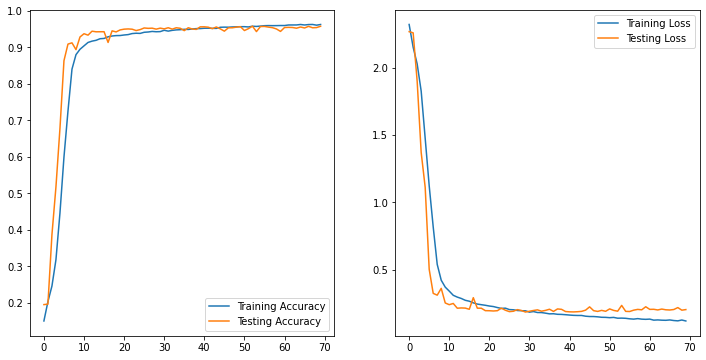

In [37]:
# No of Epoch vs. Training and testing accuracy 
#No of Epoch vs. Training and Testing Loss

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()

plt.show()

In [21]:
# Get predictions and apply inverse transformation to the labels

y_pred = model.predict(X_train)

y_pred = lb.inverse_transform(y_pred, lb.classes_)
y_train = lb.inverse_transform(y_train, lb.classes_)

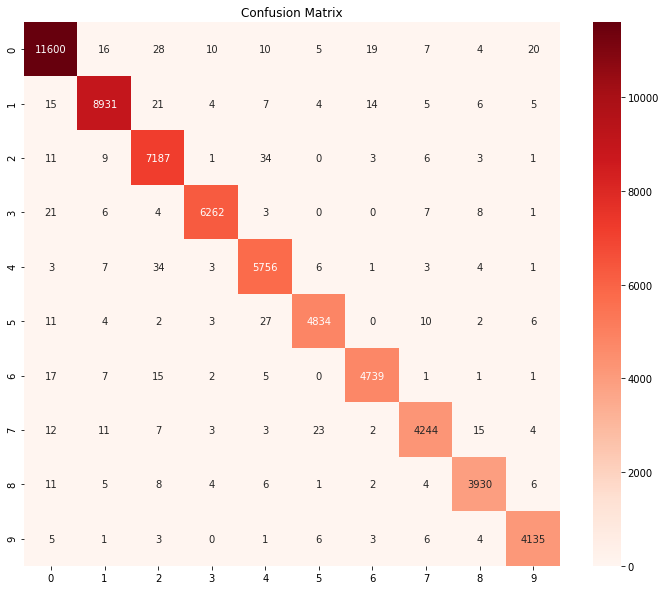

In [24]:
# Plot the confusion matrix

matrix = confusion_matrix(y_train, y_pred, labels=lb.classes_)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(matrix, annot=True, cmap='Reds', fmt='d', ax=ax)  #
plt.title('Confusion Matrix')
plt.show()